In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
ct_data = "data/clinicaltrial_data.csv"

In [20]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
ct_df = pd.read_csv(ct_data)

In [21]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [22]:
ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [41]:
# Combine the data into a single dataset
combined_df = pd.merge(ct_df, mouse_df, on=('Mouse ID'))

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [46]:
# Subset the data to the Tumor Volume and compute the means, grouped by Drug and Timepoint
subset_df = combined_df.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]

means = subset_df.groupby(["Drug", "Timepoint"]).mean()

means.head(40)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958

In [80]:
# The standard error of subset data frame
sems = subset_df.groupby(["Drug", "Timepoint"]).sem()

sems.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [83]:
#group data by "Drug" and "Timepoint" columns, 
#and calculate the mean and the standard error of the mean for the "Tumor Volume (mm3)" column
volDataDf = combined_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" :["mean", "sem"]})

In [84]:
#create a list of the tumor volume mean for each of the four drugs being compared
capVolMeanList = volDataDf.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"mean"].tolist()
infVolMeanList = volDataDf.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
ketVolMeanList = volDataDf.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
plaVolMeanList = volDataDf.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()

#create a list of the volume standard error for each of the four drugs being compared
capVolSEMList = volDataDf.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"sem"].tolist()
infVolSEMList = volDataDf.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
ketVolSEMList = volDataDf.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
plaVolSEMList = volDataDf.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()

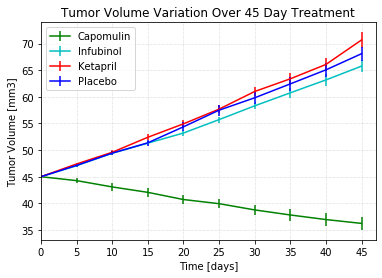

In [85]:
#create a plot for the volume data:
ax = plt.subplot(111)

#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)

#set the plot title, and axis titles
plt.title("Tumor Volume Variation Over 45 Day Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Tumor Volume [mm3]")

#plot the "mean" list vs. the established x axis with error 
#for each of the four drugs on the same coordinate axis
#and color and label each drug differently
capLineV = ax.errorbar(xAxis, capVolMeanList, yerr=capVolSEMList, fmt="g",
                   label="Capomulin")
infLineV = ax.errorbar(xAxis, infVolMeanList, yerr=infVolSEMList, fmt="c",
                   label="Infubinol")
ketLineV = ax.errorbar(xAxis, ketVolMeanList, yerr=ketVolSEMList, fmt="r",
                   label="Ketapril")
plaLineV = ax.errorbar(xAxis, plaVolMeanList, yerr=plaVolSEMList, fmt="b",
                   label="Placebo")

#set ticks along x axis to correspond to plotted x values
ax.set_xticks([value for value in xAxis], minor=False)

#add grid lines to graph 
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

#set x axis limit to end 2 units past final plotted x value
plt.xlim(0, max(xAxis)+2)

#add legend
ax.legend(loc=2)

plt.show()

In [50]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
combined_df.groupby("Drug")["Timepoint"].count()
meta_response = combined_df.groupby(["Drug", "Timepoint"])
meta_df = meta_response["Metastatic Sites"].mean().to_frame()
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [60]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
meta_response = combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
mr_df = meta_response.to_frame()
mr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [71]:
#group data by "Drug" and "Timepoint" columns, 
#and calculate the mean and the standard error of the mean for the "Metastatic Sites" column
metaDataDf = combined_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites" :["mean", "sem"]})

In [72]:
#create a list of the metastatic sites mean for each of the four drugs being compared
capMetaMeanList = metaDataDf.loc["Capomulin"].loc[:,"Metastatic Sites"].loc[:,"mean"].tolist()
infMetaMeanList = metaDataDf.loc["Infubinol"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()
ketMetaMeanList = metaDataDf.loc["Ketapril"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()
plaMetaMeanList = metaDataDf.loc["Placebo"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()

In [73]:
#create a list of the metastatic sites standard error for each of the four drugs being compared
capMetaSEMList = metaDataDf.loc["Capomulin"].loc[:,"Metastatic Sites"].loc[:,"sem"].tolist()
infMetaSEMList = metaDataDf.loc["Infubinol"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()
ketMetaSEMList = metaDataDf.loc["Ketapril"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()
plaMetaSEMList = metaDataDf.loc["Placebo"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()

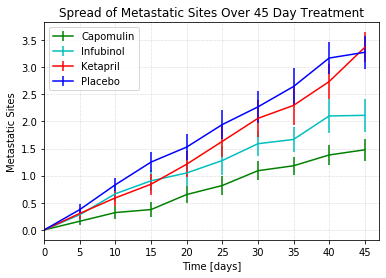

In [74]:
#create a plot for the metastatic sites data:
ax = plt.subplot(111)

#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)

#set the plot title, and axis titles
plt.title("Spread of Metastatic Sites Over 45 Day Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Metastatic Sites")

#plot the "mean" list vs. the established x axis with error 
#for each of the four drugs on the same coordinate axis
#and color and label each drug differently
capLineM = ax.errorbar(xAxis, capMetaMeanList, yerr=capMetaSEMList, fmt="g",
                   label="Capomulin")
infLineM = ax.errorbar(xAxis, infMetaMeanList, yerr=infMetaSEMList, fmt="c",
                   label="Infubinol")
ketLineM = ax.errorbar(xAxis, ketMetaMeanList, yerr=ketMetaSEMList, fmt="r",
                   label="Ketapril")
plaLineM = ax.errorbar(xAxis, plaMetaMeanList, yerr=plaMetaSEMList, fmt="b",
                   label="Placebo")

#set ticks along x axis to correspond to plotted x values
ax.set_xticks([value for value in xAxis], minor=False)

#add grid lines to graph 
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

#set x axis limit to end 2 units past final plotted x value
plt.xlim(0, max(xAxis)+2)

#add legend
ax.legend(loc=2)

#save and show the resulting figure
plt.savefig("MetastaticSiteSpread.png")
plt.show()

In [75]:
pre_mice = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice = pre_mice.to_frame()
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})
mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [76]:
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


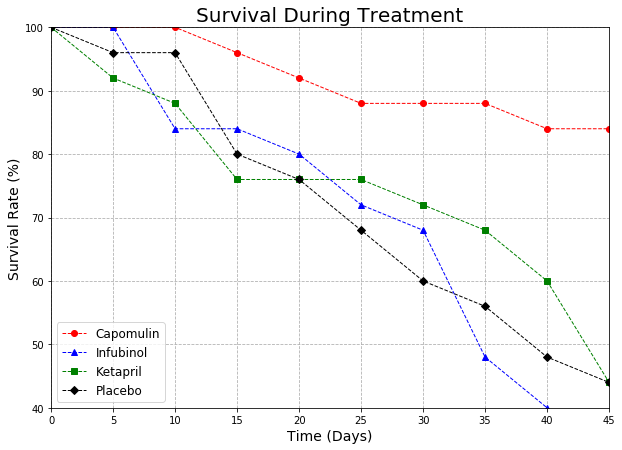

In [91]:
plt.figure(figsize=(10,7))

cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black")

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [86]:
#create variables for calculation of percent change in tumor volume over treatment course
capBarVal = int(np.divide((capVolMeanList[-1] - capVolMeanList[0]), capVolMeanList[0])*100)
infBarVal = int(np.divide((infVolMeanList[-1] - infVolMeanList[0]), infVolMeanList[0])*100)
ketBarVal = int(np.divide((ketVolMeanList[-1] - ketVolMeanList[0]), ketVolMeanList[0])*100)
plaBarVal = int(np.divide((plaVolMeanList[-1] - plaVolMeanList[0]), plaVolMeanList[0])*100)

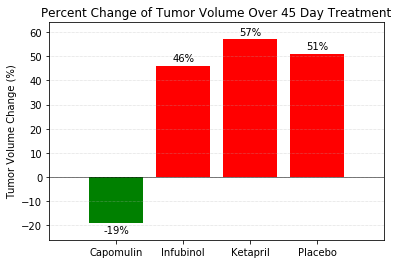

In [87]:
#create a bar graph for the tumor volume percent change data:

#set x and y axis 
yAxis = [capBarVal, infBarVal, ketBarVal, plaBarVal]
xAxis = np.arange(len(yAxis))

#set the plot title, and y axis title
plt.title("Percent Change of Tumor Volume Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")

#create a loop to color bars according to +/- percent change
colors = []
for item in yAxis:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

#plot the x and y axis data into a bar graph        
tumVolGraph = plt.bar(xAxis, yAxis, color=colors, alpha=1.0)

#set ticks along x axis to correspond to plotted x values, and label ticks accordingly
tickLoc = [value for value in xAxis]
plt.xticks(tickLoc, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

#add grid lines and a horizontal line to the graph
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)
plt.hlines(0, -1, len(xAxis), alpha = 1.0, linewidth=0.5)

#set x axis and y axis limits
plt.xlim(-1, len(xAxis))
plt.ylim(min(yAxis) - 7, max(yAxis) + 7)

#add value of each bar to the graph
def barLabel(rects):
    for i,rect in enumerate(rects):
        height = int(yAxis[i])
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2., yAxis[i] + 1, "%s%%"% (yAxis[i]),
                ha="center", va="bottom", color="black")
        else:
            plt.text(rect.get_x() + rect.get_width()/2., yAxis[i] - 1, "%s%%"% (yAxis[i]),
                ha="center", va="top", color="black")          

barLabel(tumVolGraph)

#save and show the resulting figure
plt.savefig("TumorVolumeBar.png")
plt.show()


In [ ]:
# Here are my observations from the data above:
#1. In the chart that shows the spread of metastatic sites over the 45 day treatment, it makes sense to me that 
# the mice placed on a placebo had more metastatic sites spread the quickest since they weren't actually treated. 
# Those treated with Capomulin seem to have the least amount of metastatic spread, making it seem that this is the 
#most effective medicine
#2. In the chart that shows Percent Change of Tumor Volume Over 45 Day Treatment the only treatment that has a 
# positive effect is Capomulin. Infubinol, Ketapril, and the Placebo treatments are not quite as effective. It is 
#interesting how Ketapril has the largest change in percent.  By comparing the data from other charts, it seems to be 
#slightly effective in the beginning and as time progresses, it loses it's positive effect
#3. After looking at all the data charts, it seems as though Ketapril has more of a negative effect on the mice than
# the actual placebo! Ketapril has a higher percent change in tumor volume, equal survival rate, has a higher 
# spread of metastatic sites over the course of 45 days, and a higher volume variation than placebo as well.